<a href="https://colab.research.google.com/github/myAle27admin/PIA_IntProgra_EQUIPO1_G12/blob/main/Equipo1_PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabla de Datos y Variables

| Dato | Datatype | Origen | Variables | Formulas |
|--------|--------|--------|--------|--------|
| Familia | string | se pregunta | tipo_familia | N/A |
| Biparental | string | se pregunta | es_biparental | =tipo_familia == 'B' |
| Numero de progenitores | string | se pregunta | num_padres | N/A |
| Sexo del progenitor | string | se pregunta | sexo | N/A |
| Fecha de nacimiento del progenitor | date | se pregunta | fecha_nacimiento | N/A |
| Grado academico del progenitor | string | se pregunta | grado_academico | N/A |
| Oficio del progenitor | string | se pregunta | oficio_elegido | N/A |
| Edad del progenitor | date | se pregunta | edad | =calcular_edad(fecha_nacimiento) |
| Puntaje total del progenitor | integer | se calcula | puntos | =puntos_por_edad_fertil(edad) + calcular_puntos(oficio, grado_academico) |
| Numero de hijos | integer | se pregunta | num_hijos | N/A |
| Sexo del hijo | string | se pregunta | sexo | N/A |
| Fecha de nacimiento del hijo | date | se pregunta | fecha_nacimiento | N/A |
| Edad del hijo | date | se calcula | edad | =calcular_edad(fecha_nacimiento) |
| Puntaje total del hijo | float | se calcula | puntos_hijos | puntos_hijos += 8 |

# Diagrama de Flujo
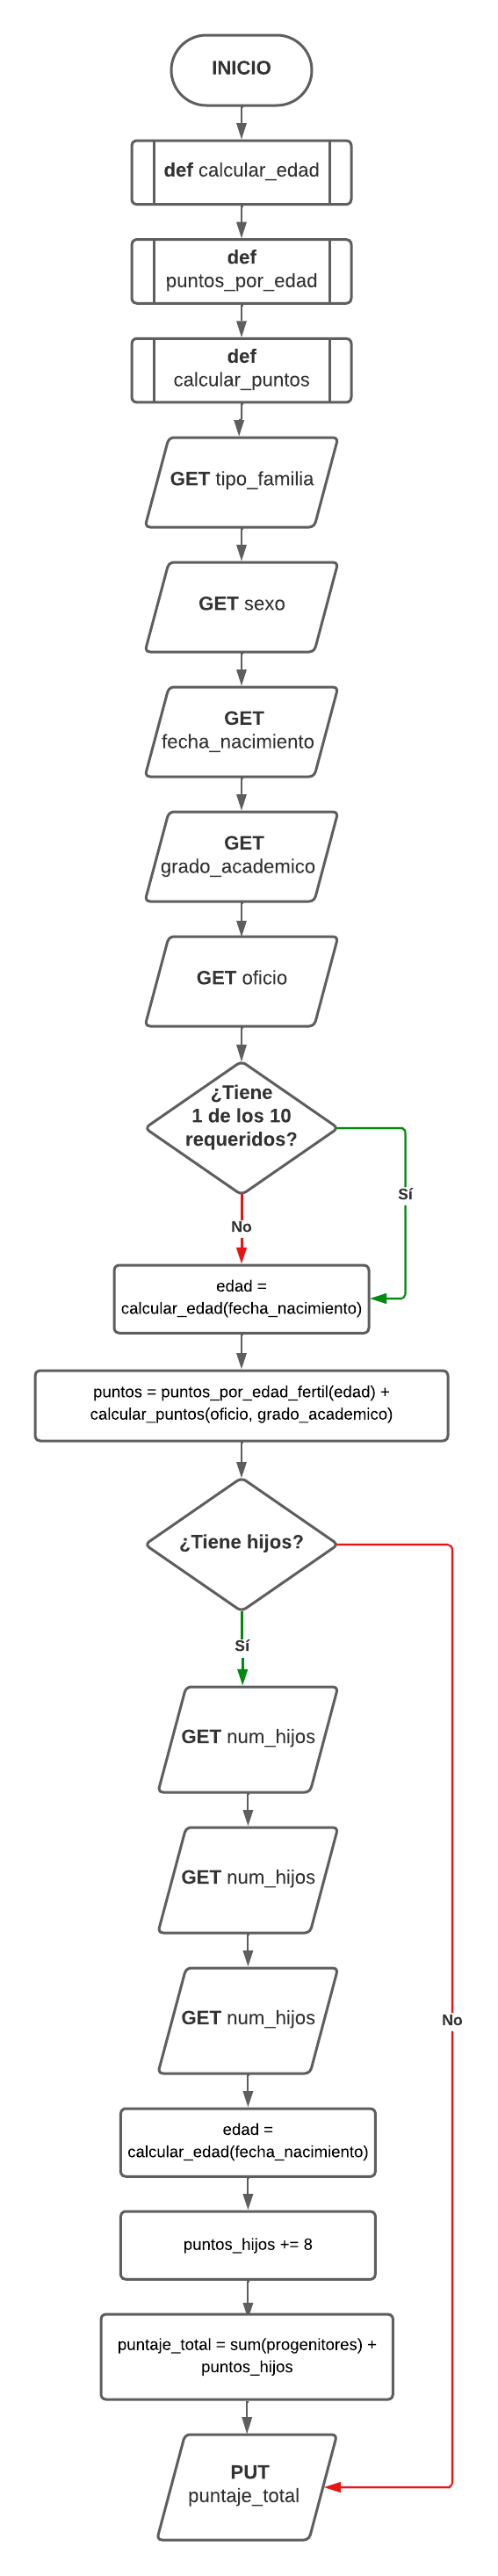

# Codificación

In [ ]:
from datetime import datetime

# Función para calcular la edad
def calcular_edad(fecha_nacimiento):
    today = datetime.today()
    age = today.year - fecha_nacimiento.year - ((today.month, today.day) < (fecha_nacimiento.month, fecha_nacimiento.day))
    return age

# Función para calcular los puntos por edad fértil
def puntos_por_edad_fertil(edad):
    if 20 <= edad <= 35:
        return 1
    else:
        return 0

# Función para calcular los puntos por oficio y grado académico
def calcular_puntos(oficio, grado_academico):
    puntos = 0
    if grado_academico != 'N':
        if oficio:
            puntos += 8
        if grado_academico == 'P':
            puntos += 5
        elif grado_academico == 'U':
            puntos += 3
    return puntos

# Preguntar si la familia es monoparental o biparental
tipo_familia = input("¿La familia es monoparental (M) o biparental (B)?: ")
es_biparental = tipo_familia == 'B'

# Ingreso de datos de progenitores
progenitores = []
num_padres = 1 if tipo_familia.lower() == 'm' else 2
for i in range(num_padres):
    print(f"Ingrese los datos del {'padre' if num_padres == 1 else 'progenitor'} {i+1}:")
    sexo = input("Ingrese el sexo (M: Masculino; F: Femenino; N: No binario): ")
    fecha_nacimiento = datetime.strptime(input("Ingrese la fecha de nacimiento (YYYY-MM-DD): "), "%Y-%m-%d")
    grado_academico = input("Ingrese el grado académico (P: Postgraduado; U: Universitario; T: Técnico; N: Ninguno): ")
    if grado_academico != 'N':
        print("Oficios requeridos en el país:")
        print("- Doctor")
        print("- Ingeniero")
        print("- Maestro")
        print("- Enfermero")
        print("- Abogado")
        print("- Electricista")
        print("- Plomero")
        print("- Carpintero")
        print("- Albañil")
        print("- Programador")
        oficio = input("¿Tiene alguno de los 10 oficios requeridos en el país? (S/N): ")
        if oficio.lower() == 's':
            oficio_elegido = input("¿Cuál oficio tiene?: ")
        else:
            oficio_elegido = None
    else:
        oficio = False
        oficio_elegido = None
    edad = calcular_edad(fecha_nacimiento)
    puntos = puntos_por_edad_fertil(edad) + calcular_puntos(oficio, grado_academico)
    if sexo == 'F':
        puntos += edad
    progenitores.append(puntos)

# Ingreso de datos de hijos
tiene_hijos = input("¿Tiene hijos? (S/N): ")
if tiene_hijos.lower() == 's':
    num_hijos = int(input("Ingrese el número de hijos: "))
    puntos_hijos = 0
    for i in range(num_hijos):
        print(f"Ingrese los datos del {'primer' if i == 0 else 'siguiente'} hijo/hija:")
        sexo = input("Ingrese el sexo (M: Masculino; F: Femenino; N: No binario): ")
        fecha_nacimiento = datetime.strptime(input("Ingrese la fecha de nacimiento del hijo (YYYY-MM-DD): "), "%Y-%m-%d")
        edad = calcular_edad(fecha_nacimiento)
        puntos_hijos += 8
        puntos_hijos += puntos_por_edad_fertil(edad) if sexo == 'F' else 0  # Agregar puntos por edad fértil si es hija
    progenitores.append(puntos_hijos)

# Cálculo de puntaje total
puntaje_total = sum(progenitores) + puntos_hijos
print("El puntaje total de la familia es:", puntaje_total)


¿La familia es monoparental (M) o biparental (B)?: B
Ingrese los datos del progenitor 1:
Ingrese el sexo (M: Masculino; F: Femenino; N: No binario): M
Ingrese la fecha de nacimiento (YYYY-MM-DD): 1995-01-02
Ingrese el grado académico (P: Postgraduado; U: Universitario; T: Técnico; N: Ninguno): P
Oficios requeridos en el país:
- Doctor
- Ingeniero
- Maestro
- Enfermero
- Abogado
- Electricista
- Plomero
- Carpintero
- Albañil
- Programador
¿Tiene alguno de los 10 oficios requeridos en el país? (S/N): S
¿Cuál oficio tiene?: Programador 
Ingrese los datos del progenitor 2:
Ingrese el sexo (M: Masculino; F: Femenino; N: No binario): F
Ingrese la fecha de nacimiento (YYYY-MM-DD): 1992-05-25
Ingrese el grado académico (P: Postgraduado; U: Universitario; T: Técnico; N: Ninguno): P
Oficios requeridos en el país:
- Doctor
- Ingeniero
- Maestro
- Enfermero
- Abogado
- Electricista
- Plomero
- Carpintero
- Albañil
- Programador
¿Tiene alguno de los 10 oficios requeridos en el país? (S/N): S
¿Cuál